<a href="https://colab.research.google.com/github/hgmhd7/AI-Machine-Learning/blob/main/my_attempt_PD2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Exploring the Impact of Sample Size on T-Distribution

**Problem Statement:**
Investigate the impact of sample size on the t-distribution through a Python program. Generate random samples of varying sizes from a standard normal distribution, compute t-statistics, and visually track the evolution of the t-distribution with increasing sample size. Provide an analysis report on the interpretation of the plots.

*Hint: Try comparting T-distribution to standard normal Z distribution*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t, norm

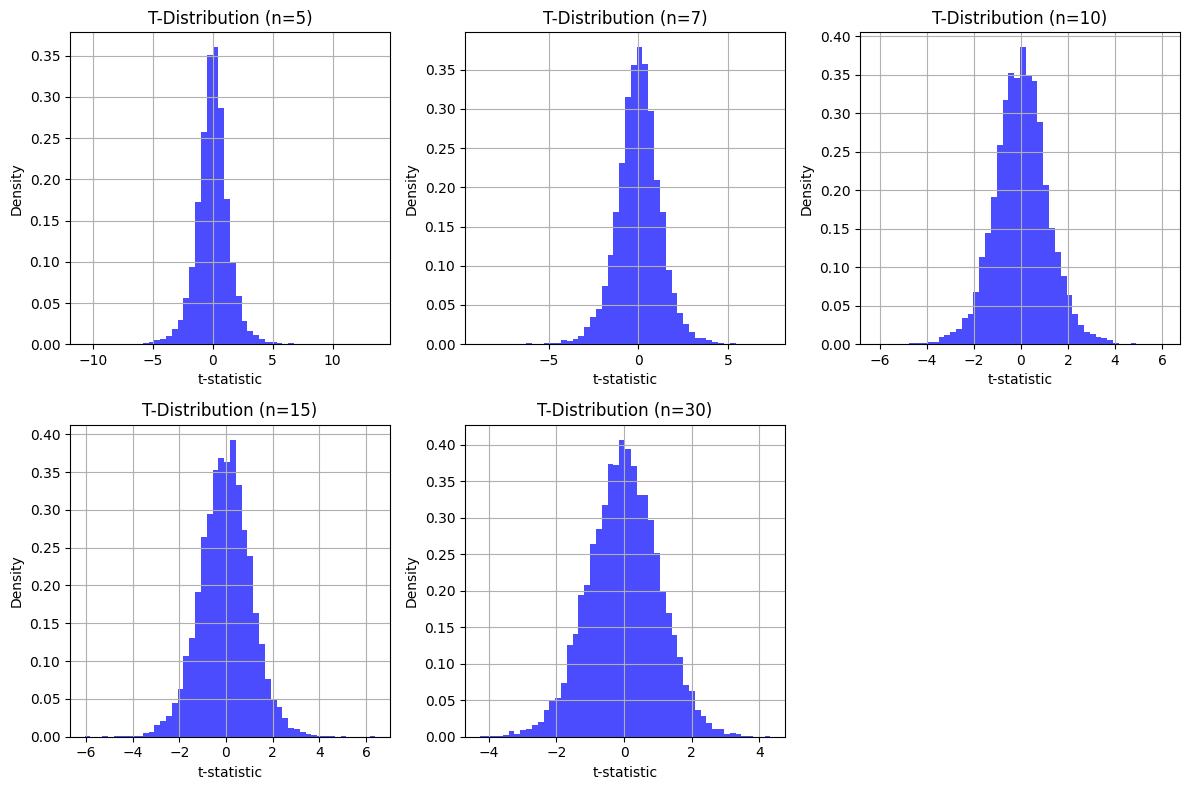

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parameters
sample_sizes = [5, 7, 10, 15, 30]  # List of sample sizes to investigate
num_samples = 10000  # Number of random samples generated for each sample size

# Generate random samples and compute t-statistics
t_distributions = []
for size in sample_sizes:
    # Generate random samples from a standard normal distribution
    samples = np.random.standard_normal((num_samples, size))

    # Compute t-statistics for each sample
    # Formula: sqrt(sample n) * (sample mean - population mean) / (sample standard deviation / sqrt(n))
    # You can assume population mean as 0 for this experiment
    # np.std calculates standard deviation, np.sqrt calculates square root
    t_stats = np.sqrt(size) * (np.mean(samples, axis=1) - 0) / (np.std(samples, axis=1, ddof=1)) # ddof review

    # Append t-statistics to the list
    t_distributions.append(t_stats)

# Plot the t-distributions for each sample size
plt.figure(figsize=(12, 8))
for i, size in enumerate(sample_sizes):
    # use plt.subplot to print the subplot
    plt.subplot(2, 3, i+1)

    # Plot histogram of t-statistics with 50 bins using plt.hist. Use alpha 0.7
    plt.hist(t_distributions[i], bins=50, density=True, alpha=0.7, color='blue')

    # Set title and labels
    plt.title(f'T-Distribution (n={size})')
    plt.xlabel('t-statistic')
    plt.ylabel('Density')

    plt.grid(True)  # Add grid lines to the plot

plt.tight_layout()  # Adjust layout to prevent overlap of subplots
plt.show()  # Display the plot


### Plotting Z-distribution

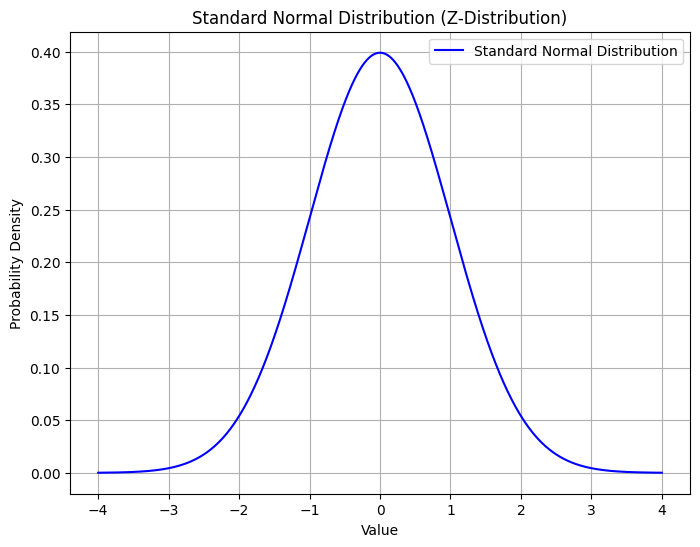

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate data points for the x-axis (range of values)
# Use np.linspace for this for x from -4 to 4. Plot 1000 values.
x = np.linspace(-4, 4, 1000)

# Compute the probability density function (PDF) for the standard normal distribution
# Use norm.pdf on x to compute the PDF
y = norm.pdf(x, loc=0, scale=1)  # use parameters loc=0 (mean), scale=1 (standard deviation)

# Plot the standard normal distribution
plt.figure(figsize=(8, 6))
plt.plot(x, y, color='blue', label='Standard Normal Distribution')

# Add labels and title
plt.title('Standard Normal Distribution (Z-Distribution)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()

# Show plot
plt.show()

In [ ]:
'''
INSERT YOUR INFERENCE HERE...

-For the standard normal distribution, the mean is zero and the standard deviation is one.

-The standard normal distribution is used to create a clean workable distribution that can easily be applied to your model to get reliable inferences.

-Regarding the T Distribution, the as the sample size increases, the standard deviation decreases due to less variance in the data
and a closer approximation to the actual population mean


'''



### 2. Simulating Dynamic Conversion Rates
**Problem Statement:** Simulate a dynamic Beta distribution representing the evolving conversion rate of a website based on user interactions. Visualize the changing distribution over multiple time steps. Provide a detailed analysis report interpreting the plots and insights gained from the dynamic Beta simulation.

To simulate a dynamic Beta distribution representing the evolving conversion rate of a website based on user interactions, we can follow these steps:

Initialize parameters:  
Define the initial shape parameters (alpha and beta) of the Beta distribution.  
Choose the number of time steps to simulate.  

Simulate the evolution of the Beta distribution:  
At each time step, update the shape parameters based on new user interactions or data.  
This update could be based on observed outcomes, such as the number of conversions and non-conversions over time.  

Visualize the changing distribution:  
Plot the Beta distribution at each time step to visualize how it evolves over time.  
Analyze the trends and patterns observed in the dynamic Beta distribution.  

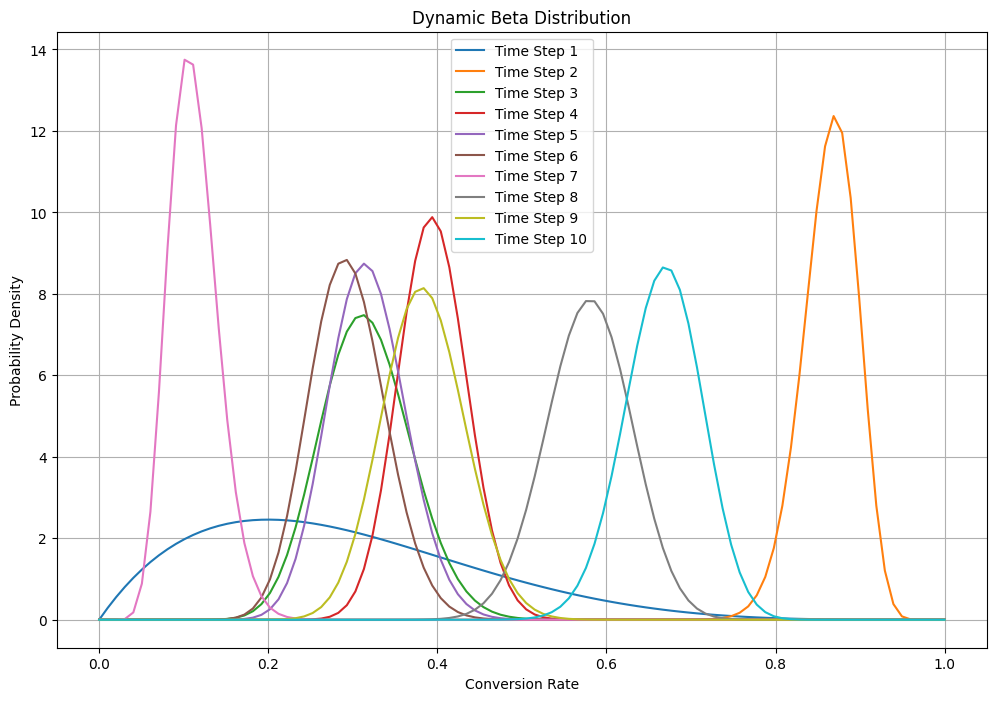

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Parameters
initial_alpha = 2  # Initial shape parameter (alpha) of the Beta distribution
initial_beta = 5   # Initial shape parameter (beta) of the Beta distribution
num_time_steps = 10  # Number of time steps to simulate

# Initialize arrays to store shape parameters and distributions
alphas = [initial_alpha]
betas = [initial_beta]
beta_distributions = [beta(initial_alpha, initial_beta)]

# Simulate the evolution of the Beta distribution over multiple time steps
for t in range(1, num_time_steps):
    # Example: Update shape parameters based on observed conversions and non-conversions
    observed_conversions = np.random.randint(10, 100)  # Simulated number of conversions
    observed_non_conversions = np.random.randint(10, 100)  # Simulated number of non-conversions

    # Update shape parameters using observed data (e.g., using Bayesian updating)
    updated_alpha = initial_alpha + observed_conversions #UPDATE ALPHA BY ADDING INITIAL ALPHA TO OBSERVED CONVERSIONS
    updated_beta = initial_beta + observed_non_conversions #UPDATE BETA BY ADDING INITIAL BETA TO OBSERVED NON-CONVERSIONS

    # Store updated shape parameters
    alphas.append(updated_alpha)
    betas.append(updated_beta)

    # Generate the Beta distribution with updated shape parameters
    beta_distribution = beta(updated_alpha, updated_beta) # Use updated alpha and updated beta to generate beta distribution using the beta function
    beta_distributions.append(beta_distribution)

# Visualize the changing Beta distribution over time
plt.figure(figsize=(12, 8))
for t in range(num_time_steps):
    plt.plot(np.linspace(0, 1, 100), beta_distributions[t].pdf(np.linspace(0, 1, 100)), label=f'Time Step {t+1}')

plt.title('Dynamic Beta Distribution')
plt.xlabel('Conversion Rate')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

In this code:

We initialize parameters such as the initial shape parameters (initial_alpha and initial_beta) of the Beta distribution and the number of time steps to simulate (num_time_steps).  
We simulate the evolution of the Beta distribution over multiple time steps. At each time step, we update the shape parameters based on simulated observations (e.g., conversions and non-conversions).  
We visualize the changing Beta distribution at each time step by plotting the probability density function (PDF) of the Beta distribution using Matplotlib.  

:## 3. ADVANCED: Insights from Dynamic beta simulation

In [ ]:
'''
What are the insights that can be gained from the dynamic Beta simulation and visualization? Write them here.

1. Time 7- The peak is really high and narrow at around the .05 area.  That means that there is a big probability that
this is the true conversion rate for that time period.  Furthermore, the range is narrow meaning that there is not much variance from this
conversion rate, so we are sure that the true conversion rate is likely within a tight band around .05 plus or minus.

-Last but not least, the skewedness is pretty even on either side of this conversion rate, therefore, there is a relatively equal chance that
the true conversion rate would be higher or lower that the peak conversion probability.


2. Time 1, the max conversion rate is likely .2 since that is the peak.  Since the bell is so fat, there is a higher standard deviation here.

This means that we are not as confident that the actual conversion rate is right at .2.  In fact, since the curve is so  blunted and short, we don't have
overwhelming confidence that .2 is the likely conversion rate in reality, however in relation to the other random variable probabilities at the
time, it is the most likely conversion rate relatively speaking.  Regarding the skewedness, the PDF is right skewed, meaning that
the likelihood of the conversion rate being lower than .2  is much higher than the likely hood of the conversion rate being above .2


'''